In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [224]:
# Load the dataset
df = pd.read_csv('customer_churn.csv')

In [225]:

# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [226]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [227]:
# Basic statistics of the dataset
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Data Preprocessing

In [228]:
# Convert 'TotalCharges' to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [229]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [230]:
# Drop the customerID column as it's not needed for modeling
df.drop(columns=['customerID'], inplace=True)

In [231]:
# Separate features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

In [232]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [233]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [234]:

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Train and evaluate models

In [235]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = auc(roc_curve(y_test, y_pred_prob)[0], roc_curve(y_test, y_pred_prob)[1])
    results.append({'Model': name, 'Accuracy': accuracy, 'AUC': roc_auc})
    print(f"{name}: Accuracy = {accuracy:.4f}, AUC = {roc_auc:.4f}")


Logistic Regression: Accuracy = 0.8162, AUC = 0.8613
XGBoost: Accuracy = 0.8119, AUC = 0.8602


In [236]:
# Model Performance Comparison
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy       AUC
0  Logistic Regression  0.816182  0.861272
1              XGBoost  0.811923  0.860237


C:\Users\Admin\AppData\Local\Temp\ipykernel_19452\198363615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


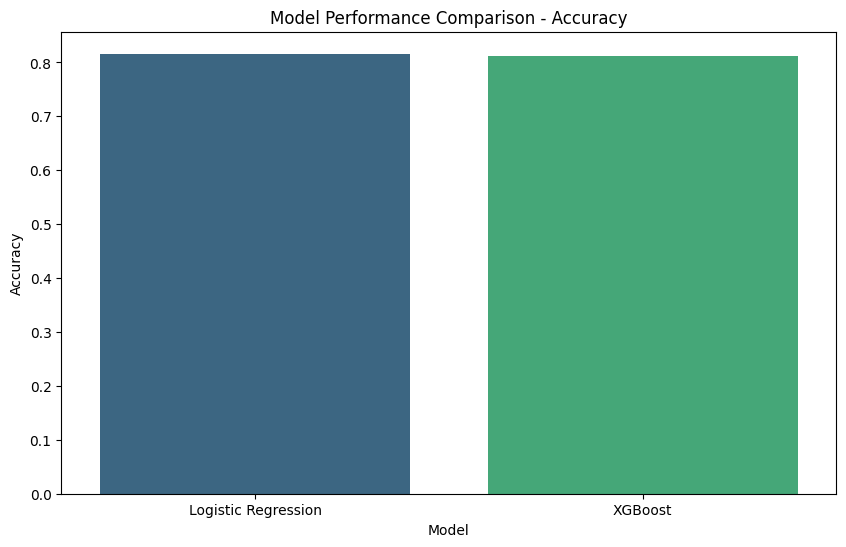

C:\Users\Admin\AppData\Local\Temp\ipykernel_19452\198363615.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis')


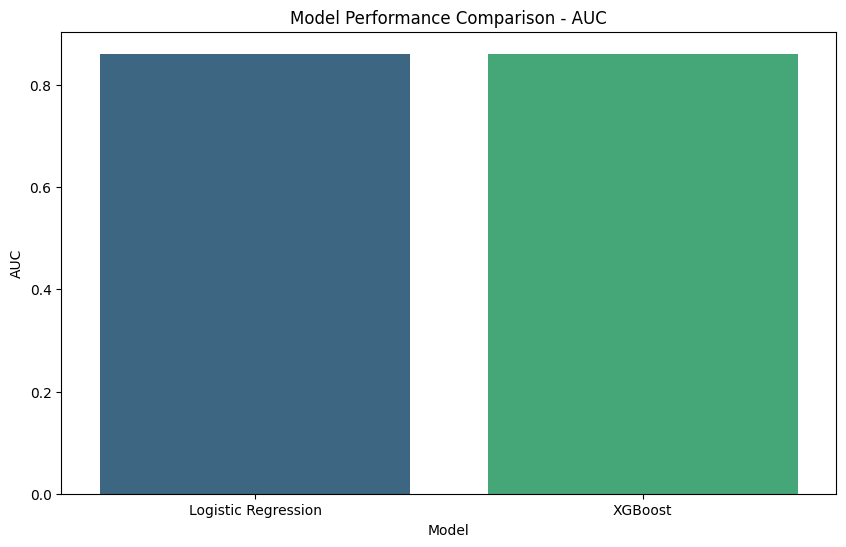

In [237]:
# Plot model performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Performance Comparison - Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis')
plt.title('Model Performance Comparison - AUC')
plt.show()

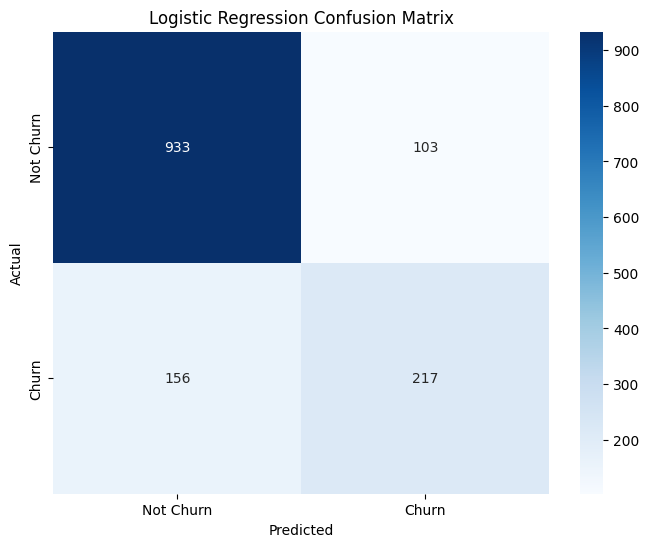

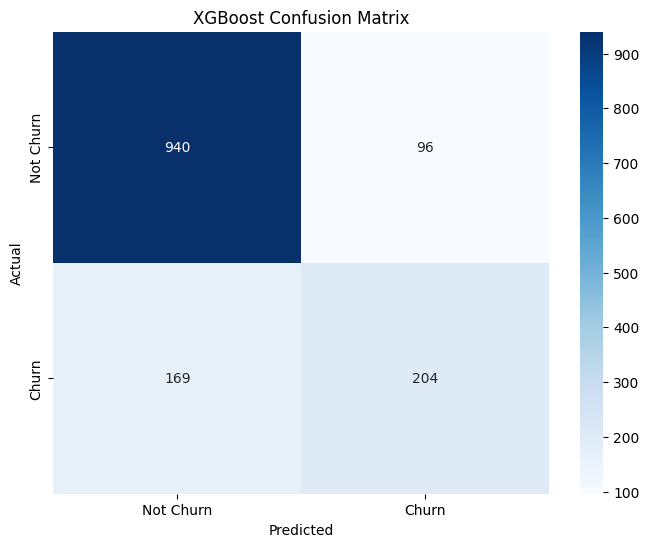

In [238]:
# Confusion Matrix Visualization
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


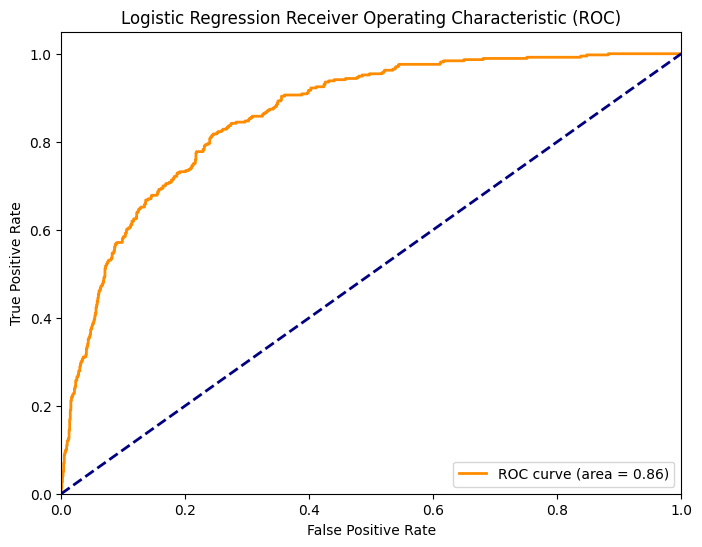

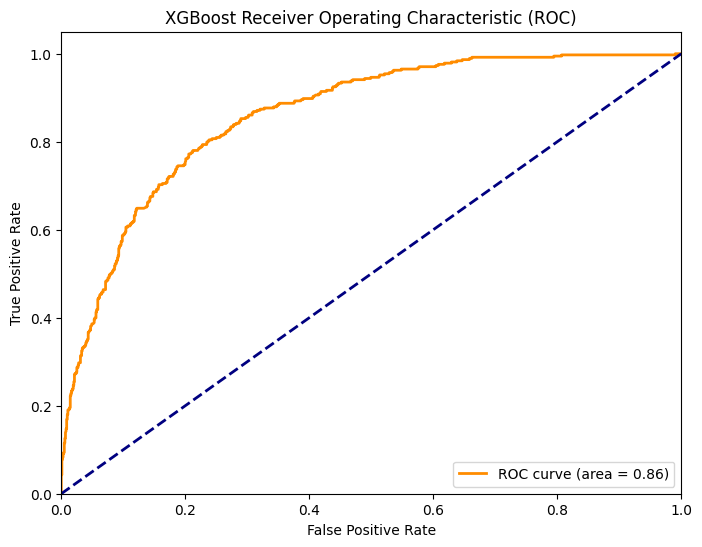

In [239]:
# ROC Curve Visualization
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [240]:
# Prepare New Data for Prediction
new_data = pd.DataFrame({
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': [0],
    'Dependents': [0],
    'tenure': [2],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [1],  # 0: No, 1: DSL, 2: Fiber optic
    'OnlineSecurity': [1],  # 0: No, 1: Yes
    'OnlineBackup': [1],    # 0: No, 1: Yes
    'DeviceProtection': [0],# 0: No, 1: Yes
    'TechSupport': [0],     # 0: No, 1: Yes
    'StreamingTV': [0],     # 0: No, 1: Yes
    'StreamingMovies': [0], # 0: No, 1: Yes
    'Contract': [0],        # 0: Month-to-month, 1: One year, 2: Two year
    'PaperlessBilling': [1],# 0: No, 1: Yes
    'PaymentMethod': [3],   # 0: Bank transfer (automatic), 1: Credit card (automatic), 2: Electronic check, 3: Mailed check
    'MonthlyCharges': [53.85],
    'TotalCharges': [108.15]
})

In [241]:
# Encode categorical variables (if any new categorical columns are present)
label_encoder = LabelEncoder()
categorical_columns = new_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    new_data[col] = label_encoder.fit_transform(new_data[col])

# Scale the new data using the loaded scaler
new_data_scaled = scaler.transform(new_data)

# Make Predictions
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(new_data_scaled)
    predictions[name] = ['Churn' if pred == 1 else 'No Churn' for pred in predictions[name]]

In [242]:
# Print the predictions
for name, preds in predictions.items():
    print(f"{name} Predictions: {preds}")

Logistic Regression Predictions: ['No Churn']
XGBoost Predictions: ['No Churn']


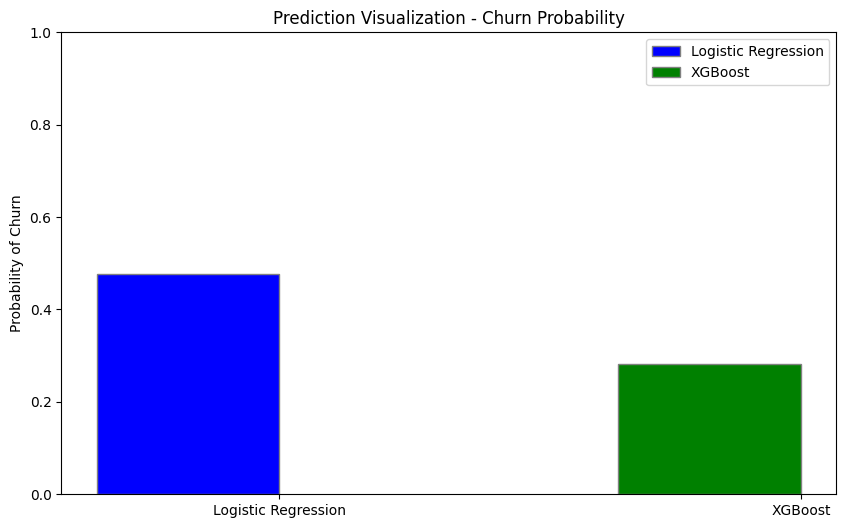

In [243]:
# Prediction Visualization using probabilities
plt.figure(figsize=(10, 6))
colors = ['blue', 'green']  # Define colors for each model
bar_width = 0.35  # Width of the bars

# Positions of the left bar-boundaries
r1 = range(len(predictions))
# Positions of the x-axis ticks (center of the bars)
r2 = [x + bar_width / 2 for x in r1]

# Collect prediction probabilities
probabilities = {}
for name, model in models.items():
    y_pred_prob = model.predict_proba(new_data_scaled)[:, 1]
    probabilities[name] = y_pred_prob[0]

for i, (name, prob) in enumerate(probabilities.items()):
    # Plot bars with labels
    plt.bar(r1[i], [prob], color=colors[i], width=bar_width, edgecolor='grey', label=name)

# Set x-ticks
plt.xticks(r2, probabilities.keys())

plt.title('Prediction Visualization - Churn Probability')
plt.ylabel('Probability of Churn')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.legend()  # Add legend
plt.show()